In [170]:
pwd

'/mmfs1/data/aglinska/BC-fMRI-AE/Notebooks'

In [171]:
import numpy as np
import os 
from matplotlib import pyplot as plt
from tqdm import tqdm
from helper_funcs import *

import pandas as pd

In [172]:
ofdir = '../Assets/abide_1_cmats'
cmat_files = os.listdir(ofdir)
cmat_files.sort()
cmats = np.array([np.load(os.path.join(ofdir,cmat_file)) for cmat_file in tqdm(cmat_files)])

100%|██████████| 677/677 [00:00<00:00, 1768.20it/s]


In [173]:
cmats.shape

(677, 51, 51)

In [174]:
df = pd.read_csv('../Data/ABIDE_df2.csv')
csubs = [cmat_file.replace('.npy','') for cmat_file in cmat_files]
is_indf = np.array([val in csubs for val in df['bids_folder'].values])
df = df.iloc[is_indf]
df

,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
0,50002,1,1.0,16.77,1,Ambi,NaN,103.0,116.0,89.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050002,13
1,50003,1,1.0,24.45,1,R,NaN,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050003,13
2,50004,1,1.0,19.09,1,R,NaN,113.0,108.0,117.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050004,13
3,50005,1,1.0,13.73,2,R,NaN,119.0,117.0,118.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050005,13
4,50006,1,1.0,13.37,1,L,NaN,109.0,99.0,119.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050006,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,51583,1,2.0,35.00,1,NaN,100.0,95.0,105.0,84.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051583,14
1044,51584,1,2.0,49.00,1,NaN,100.0,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,23.24,sub-SBL0051584,14
1045,51585,1,1.0,27.00,1,NaN,90.0,96.0,99.0,106.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051585,14
1046,51606,1,2.0,29.00,2,R,NaN,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-MaxMuna0051606,6


In [175]:
has_nans = np.array([np.isnan(cmats[i,:,:]).sum()>0 for i in range(cmats.shape[0])])
cmats = cmats[~has_nans,:,:]

In [176]:
has_nans.sum()

14

In [177]:
np.nonzero(has_nans)[0]

array([ 35,  37,  40,  42,  46,  49, 154, 162, 215, 578, 586, 589, 603,
       610])

In [178]:
np.array(cmat_files)[has_nans]

array(['sub-Caltech0051464.npy', 'sub-Caltech0051466.npy',
       'sub-Caltech0051469.npy', 'sub-Caltech0051471.npy',
       'sub-Caltech0051475.npy', 'sub-Caltech0051478.npy',
       'sub-Leuven20050727.npy', 'sub-Leuven20050736.npy',
       'sub-MaxMunc0051339.npy', 'sub-SDSU0050184.npy',
       'sub-SDSU0050192.npy', 'sub-SDSU0050195.npy',
       'sub-SDSU0050209.npy', 'sub-SDSU0050216.npy'], dtype='<U23')

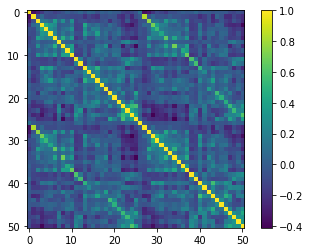

In [179]:
plt.imshow(cmats.mean(axis=0))
plt.colorbar()

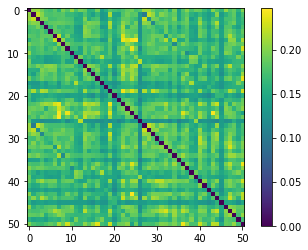

In [180]:
plt.imshow(cmats.std(axis=0))
plt.colorbar()

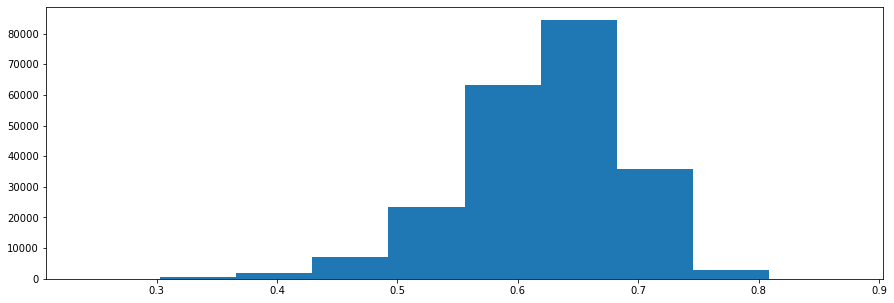

In [181]:
plt.figure(figsize=(15,5))
plt.hist(get_triu(np.corrcoef(cmats.reshape(cmats.shape[0],-1))));

In [182]:
cmats.shape

(663, 51, 51)

In [183]:
df

,participant_id,DX_GROUP,DSM_IV_TR,AGE_AT_SCAN,SEX,HANDEDNESS_CATEGORY,HANDEDNESS_SCORES,FIQ,VIQ,PIQ,...,WISC_IV_MATRIX_SCALED,WISC_IV_DIGIT_SPAN_SCALED,WISC_IV_LET_NUM_SCALED,WISC_IV_CODING_SCALED,WISC_IV_SYM_SCALED,EYE_STATUS_AT_SCAN,AGE_AT_MPRAGE,BMI,bids_folder,site
0,50002,1,1.0,16.77,1,Ambi,NaN,103.0,116.0,89.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050002,13
1,50003,1,1.0,24.45,1,R,NaN,124.0,128.0,115.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050003,13
2,50004,1,1.0,19.09,1,R,NaN,113.0,108.0,117.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050004,13
3,50005,1,1.0,13.73,2,R,NaN,119.0,117.0,118.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050005,13
4,50006,1,1.0,13.37,1,L,NaN,109.0,99.0,119.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-Pitt0050006,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1043,51583,1,2.0,35.00,1,NaN,100.0,95.0,105.0,84.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051583,14
1044,51584,1,2.0,49.00,1,NaN,100.0,NaN,133.0,135.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,23.24,sub-SBL0051584,14
1045,51585,1,1.0,27.00,1,NaN,90.0,96.0,99.0,106.0,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-SBL0051585,14
1046,51606,1,2.0,29.00,2,R,NaN,118.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,sub-MaxMuna0051606,6


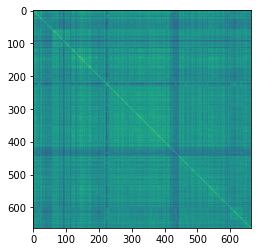

In [184]:
plt.imshow(np.corrcoef(cmats.reshape(cmats.shape[0],-1)))

(array([2.3000e+01, 4.8400e+02, 2.0200e+03, 6.9960e+03, 2.3320e+04,
        6.3365e+04, 8.4446e+04, 3.5808e+04, 2.9770e+03, 1.4000e+01]),
 array([0.23986178, 0.30306174, 0.36626171, 0.42946168, 0.49266164,
        0.55586161, 0.61906157, 0.68226154, 0.74546151, 0.80866147,
        0.87186144]),
 <BarContainer object of 10 artists>)

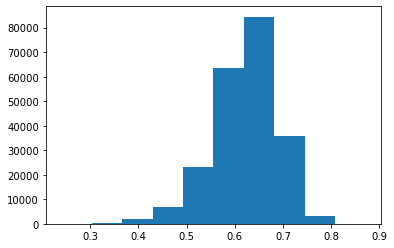

In [233]:
plt.hist(get_triu(np.corrcoef(cmats.reshape(cmats.shape[0],-1))))

In [200]:
import networkx as nx

In [205]:
from karateclub.graph_embedding import Graph2Vec

In [217]:
model = Graph2Vec()

In [220]:
graph.number_of_nodes()

51

In [222]:
graphs = [nx.convert_matrix.from_numpy_array(cmats[i,:,:]) for i in range(cmats.shape[0])]
model.fit(graphs)

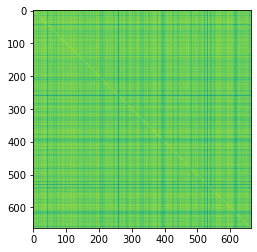

In [229]:
plt.imshow(np.corrcoef(model.get_embedding()))

(array([4.00000e+00, 1.50000e+01, 7.80000e+01, 4.64000e+02, 1.22400e+03,
        4.00200e+03, 1.03730e+04, 4.02880e+04, 1.18332e+05, 4.46730e+04]),
 array([0.76238251, 0.78419383, 0.80600515, 0.82781646, 0.84962778,
        0.8714391 , 0.89325042, 0.91506173, 0.93687305, 0.95868437,
        0.98049569]),
 <BarContainer object of 10 artists>)

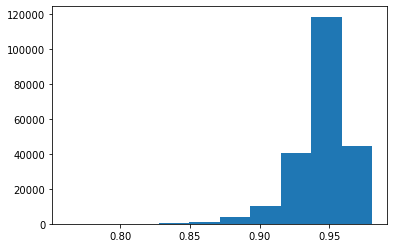

In [231]:
plt.hist(get_triu(np.corrcoef(model.get_embedding())))